# 1. Import dataset and split into Attributes and Target

In [1]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the input dataset
df = pd.read_csv('dataset-milp.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,0.697268,0.678708,0.170287,0.299289,0.265196,0.312688,96.362191,303625.0,440929.412497,0.338158,...,15.946398,2982.526508,0.000057,0.0,0.275699,0.793055,0.276665,0.193348,0.115547,1
1,0.581061,0.500113,1.867937,0.399004,0.188342,0.571154,96.774017,292655.0,440929.412497,0.315893,...,15.370571,3067.976531,0.000063,0.0,0.197311,0.739007,0.259700,0.189215,0.129725,1
2,1.172942,0.680468,0.922898,0.438675,0.266292,0.149626,90.145810,362571.0,440929.412497,0.511973,...,32.691052,3035.213593,0.000077,0.0,0.110119,0.441318,0.243410,0.137412,0.110670,1
3,1.232131,0.348118,1.537661,0.534801,0.209957,0.598314,83.192805,294950.0,440929.412497,0.553111,...,34.352536,3031.742607,0.000086,0.0,0.028721,0.298804,0.256905,0.136087,0.119592,1
4,0.707604,0.385324,1.095049,0.225140,0.048173,0.069710,144.418012,385087.0,440929.412497,0.071392,...,3.008913,2952.409749,0.000025,0.0,0.488932,0.880758,0.241180,0.229281,0.132368,0
5,0.977794,0.310722,2.919025,0.172266,0.168552,0.338670,25.831430,59714.0,440929.412497,0.030614,...,0.044198,627.729290,0.000135,0.0,0.041008,0.182947,0.020438,0.064316,0.023326,1
6,0.489606,0.413165,2.554127,0.475038,0.275661,0.273458,247.879683,343589.0,440929.412497,0.538230,...,31.994034,3107.654538,0.000081,0.0,0.297408,0.528598,0.257700,0.140624,0.112371,1
7,0.315551,0.523409,1.578231,0.367530,0.339704,0.404677,2914.696259,328193.0,440929.412497,0.454542,...,19.542124,3091.027641,0.000072,0.0,0.420774,0.718577,0.276990,0.180149,0.114463,0
8,0.666896,0.463173,1.809621,0.184534,0.083466,0.361378,111.559107,173731.0,440929.412497,0.000724,...,0.000163,1952.425222,0.000033,0.0,0.429831,0.649910,0.082992,0.173737,0.082502,1
9,0.606984,0.934688,2.499715,0.293858,0.165041,0.717921,95.964334,245844.0,440929.412497,0.189848,...,1.368264,3001.804609,0.000046,0.0,0.474055,0.995912,0.258198,0.236334,0.134023,1


In [2]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [ ]:
df.shape

In [ ]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

In [3]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]']]
y_curtail = Dataset['Curtailment_[TWh]']
y_shed = Dataset['Shedding_[MWh]']
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
X

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.697268,0.678708,0.170287,0.299289,0.265196,0.312688
1,0.581061,0.500113,1.867937,0.399004,0.188342,0.571154
2,1.172942,0.680468,0.922898,0.438675,0.266292,0.149626
3,1.232131,0.348118,1.537661,0.534801,0.209957,0.598314
4,0.707604,0.385324,1.095049,0.225140,0.048173,0.069710
5,0.977794,0.310722,2.919025,0.172266,0.168552,0.338670
6,0.489606,0.413165,2.554127,0.475038,0.275661,0.273458
7,0.315551,0.523409,1.578231,0.367530,0.339704,0.404677
8,0.666896,0.463173,1.809621,0.184534,0.083466,0.361378
9,0.606984,0.934688,2.499715,0.293858,0.165041,0.717921


In [4]:
# Check for missing data in the target
### your code here
nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [6]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio        0.069775
ShareFlex           -0.359976
ShareStorage         0.015365
ShareWind            0.914064
SharePV              0.435223
rNTC                -0.139795
Curtailment_[TWh]    1.000000
Shedding_[MWh]      -0.030090
Name: Curtailment_[TWh], dtype: float64


In [7]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio       -0.463587
ShareFlex           -0.133411
ShareStorage         0.120543
ShareWind           -0.020750
SharePV              0.123186
rNTC                -0.179837
Curtailment_[TWh]   -0.030090
Shedding_[MWh]       1.000000
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : Curtailement

In [8]:
print(X.shape)
print(y_curtail.shape)
print(type(X))
print(type(y_curtail))

(32, 6)
(32,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.697268,0.678708,0.170287,0.299289,0.265196,0.312688
1,0.581061,0.500113,1.867937,0.399004,0.188342,0.571154
2,1.172942,0.680468,0.922898,0.438675,0.266292,0.149626


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.copy()))
X_scaled.head(3)

,0,1,2,3,4,5
0,0.388327,0.602271,0.025343,0.339261,0.779537,0.418063
1,0.270108,0.348468,0.627301,0.605585,0.552132,0.789235
2,0.872239,0.604772,0.292206,0.711542,0.782779,0.183898


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_y_cu = MinMaxScaler()
ydf = pd.DataFrame(y_curtail.copy())
y_curtail_scaled = pd.DataFrame(scaler_y_cu.fit_transform(ydf))
y_curtail_scaled.head()

,0
0,0.269885
1,0.294344
2,0.758116
3,0.888073
4,0.021961


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_curtail_train, y_curtail_test = train_test_split(X_scaled, y_curtail_scaled, test_size=0.3,random_state=42)

X_train, X_val, y_curtail_train, y_curtail_val = train_test_split(X_train, y_curtail_train, test_size=0.2,
                                                    shuffle=False)

print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 17
Taille de l'ensemble de validation   : 5
Taille de l'ensemble de test         : 10


# 3. Model Building

In [18]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

num_folds = 10
error_metrics = {'neg_mean_absolute_error','neg_root_mean_squared_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor())} #,('SVR', SVR()), ('AdaB', AdaBoostRegressor())}

Evaluation metric:  neg_root_mean_squared_error
Model  MLP


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_p

Model  RFR


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[('MLP', -0.12669497429157126, 0.06307517614965572), ('RFR', -0.15174287566177608, 0.0771812960833737)]


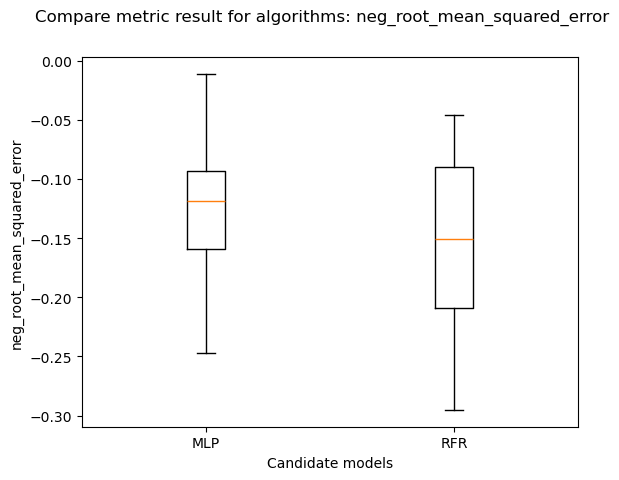

Evaluation metric:  neg_mean_absolute_error
Model  MLP


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\neural_network\_multilayer_p

Model  RFR


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[('MLP', -0.15911891011840798, 0.07671155376118806), ('RFR', -0.14083788380180975, 0.06325489198708172)]


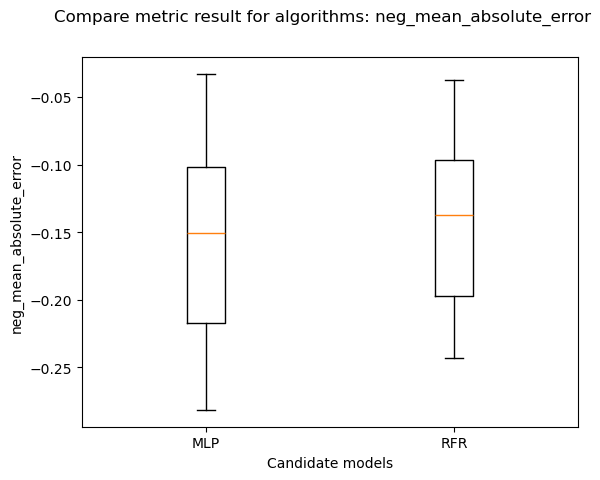

In [19]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_curtail_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.savefig('MAEComparison')
    plt.show()

    results = []


In [ ]:
# RFR seems to be the best regression model : 

modelo = RandomForestRegressor()
scoring='neg_root_mean_squared_error'
params = {
    # Number of trees in random forest
    'n_estimators': [5, 100, 300],  # default=100
     # Maximum number of levels in tree
    'max_depth': [None, 5,10],  #deafult = None
     # Method of selecting samples for training each tree
    'min_samples_split': [2, 5, 10],
}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

In [ ]:
final_model = RandomForestRegressor() ## train again with the winner model from the Grid Search
final_model.fit(X_train,y_train)  # Model training 
y_predict = final_model.predict(X_test)  # prediction calculation
y_predict

In [ ]:
import math 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Invert the scaling and plot the results
y_test_unsc = np.reshape(y_test, (len(y_test), 1))
y_test_inv = scaler_y.inverse_transform(y_test_unsc)

y_predict_uns = np.reshape(y_predict, (len(y_predict), 1))
y_predict_inv = scaler_y.inverse_transform(y_predict_uns)
y_test_inv

In [ ]:
# Plot the prediction on the test datas vs the real data y
x = range(len(y_predict_inv))
plt.figure(figsize=(20,5))
plt.xlabel('Time', size=15)
plt.ylabel('Energy produced (€/MWh)', size=15)
plt.plot(x, y_predict_inv, alpha=0.4, color='blue', label='PV predict')
plt.plot(x, y_test_inv, alpha=0.4, color='red',  label='PV real')
plt.title('Prediction vs Real')
plt.legend()
plt.savefig('PredVSReal1.png')
plt.show()
